In [1]:
from model.lf_model import LearnableTrapezoidal
from utils.pde_utils import train, evaluate, get_exact_solution
from utils.plot_utils import plot
import torch
import numpy as np

In [2]:
def test_heat():
    """Тест уравнения теплопроводности"""
    
    model = LearnableTrapezoidal('heat', input_dim=2)
    domain = {'x': (0.0, 1.0), 't': (0.0, 0.5)}
    exact_sol = get_exact_solution('heat')
    
    print("Тест: Уравнение теплопроводности")
    print("=" * 50)
    
    history = train(model, domain, epochs=5000, exact_solution=exact_sol, lambda_bc = 500)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    print(f"u-параметр: {results['u_param']:.4f}")
    print(f"PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"Средняя ошибка: {results['mean_error']:.2e}")
    
    plot(results, history, "Уравнение теплопроводности с обучаемым методом трапеций")
    
def test_wave():
    """Тест волнового уравнения"""
    
    model = LearnableTrapezoidal('wave', input_dim=2)
    domain = {'x': (0.0, 1.0), 't': (0.0, 1.0)}
    exact_sol = get_exact_solution('wave')
    
    print("Тест: Волновое уравнение")
    print("=" * 50)
    
    history = train(model, domain, epochs=5000, exact_solution=exact_sol)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    print(f"u-параметр: {results['u_param']:.4f}")
    print(f"PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"Средняя ошибка: {results['mean_error']:.2e}")
    
    plot(results, history, "Волновое уравнение с обучаемым методом трапеций")
    
def test_burgers():
    """Тест уравнения Бюргерса"""
    
    model = LearnableTrapezoidal('burgers', input_dim=2)
    domain = {'x': (-1.0, 1.0), 't': (0.01, 0.3)}
    exact_sol = get_exact_solution('burgers')
    
    print("Тест: Уравнение Бюргерса")
    print("=" * 50)
    
    history = train(model, domain, epochs=5000, exact_solution=exact_sol)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    print(f"u-параметр: {results['u_param']:.4f}")
    print(f"PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"Средняя ошибка: {results['mean_error']:.2e}")
    
    plot(results, history, "Уравнение Бюргерса с обучаемым методом трапеций")
    
def test_poisson():
    """Тест уравнения Пуассона"""
    
    model = LearnableTrapezoidal('poisson', input_dim=2)
    domain = {'x': (0.0, 1.0), 'y': (0.0, 1.0)}
    exact_sol = get_exact_solution('poisson')
    
    print("Тест: Уравнение Пуассона")
    print("=" * 50)
    
    history = train(model, domain, epochs=5000, exact_solution=exact_sol, lambda_bc=1000)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    print(f"u-параметр: {results['u_param']:.4f}")
    print(f"PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"Средняя ошибка: {results['mean_error']:.2e}")
    
    # Показываем графики
    plot(results, history, "Уравнение Пуассона с обучаемым методом трапеций")
    
def test_reaction_diffusion():
    """Уравнение диффузии"""
    
    model = LearnableTrapezoidal('reaction_diffusion', input_dim=2)
    domain = {'x': (-1.0, 3.0), 't': (0.0, 2.0)}
    exact_sol = get_exact_solution('reaction_diffusion')
    
    print("Тест: Уравнение диффузии")
    print("=" * 50)
    
    history = train(model, domain, epochs=5000, exact_solution=exact_sol)
    results = evaluate(model, domain, exact_solution=exact_sol)
    
    print(f"u-параметр: {results['u_param']:.4f}")
    print(f"PDE остаток: {results['pde_residual']:.2e}")
    if 'mean_error' in results:
        print(f"Средняя ошибка: {results['mean_error']:.2e}")
    
    # Показываем графики
    plot(results, history, "Уравнение диффузии с обучаемым методом трапеций")

Тест: Уравнение теплопроводности
Epoch    0: Loss=7.30e+00, PDE=6.11e-04, BC=3.05e-03, IC=5.78e-01, 
Epoch  500: Loss=4.37e+00, PDE=4.73e-03, BC=2.25e-04, IC=4.25e-01, 
Epoch 1000: Loss=4.00e+00, PDE=2.44e-01, BC=3.81e-04, IC=3.57e-01, 
Epoch 1500: Loss=4.09e+00, PDE=3.60e-01, BC=5.40e-04, IC=3.46e-01, 
Epoch 2000: Loss=3.83e+00, PDE=3.74e-01, BC=5.82e-04, IC=3.16e-01, 
Epoch 2500: Loss=3.37e+00, PDE=4.25e-01, BC=7.69e-04, IC=2.56e-01, 
Epoch 3000: Loss=3.03e+00, PDE=5.02e-01, BC=6.56e-04, IC=2.20e-01, 
Epoch 3500: Loss=2.78e+00, PDE=5.73e-01, BC=7.38e-04, IC=1.84e-01, 
Epoch 4000: Loss=2.09e+00, PDE=5.44e-01, BC=3.58e-04, IC=1.36e-01, 
Epoch 4500: Loss=1.79e+00, PDE=5.54e-01, BC=5.28e-04, IC=9.68e-02, 
u-параметр: 0.9868
PDE остаток: 5.23e-01
Средняя ошибка: 2.49e-02


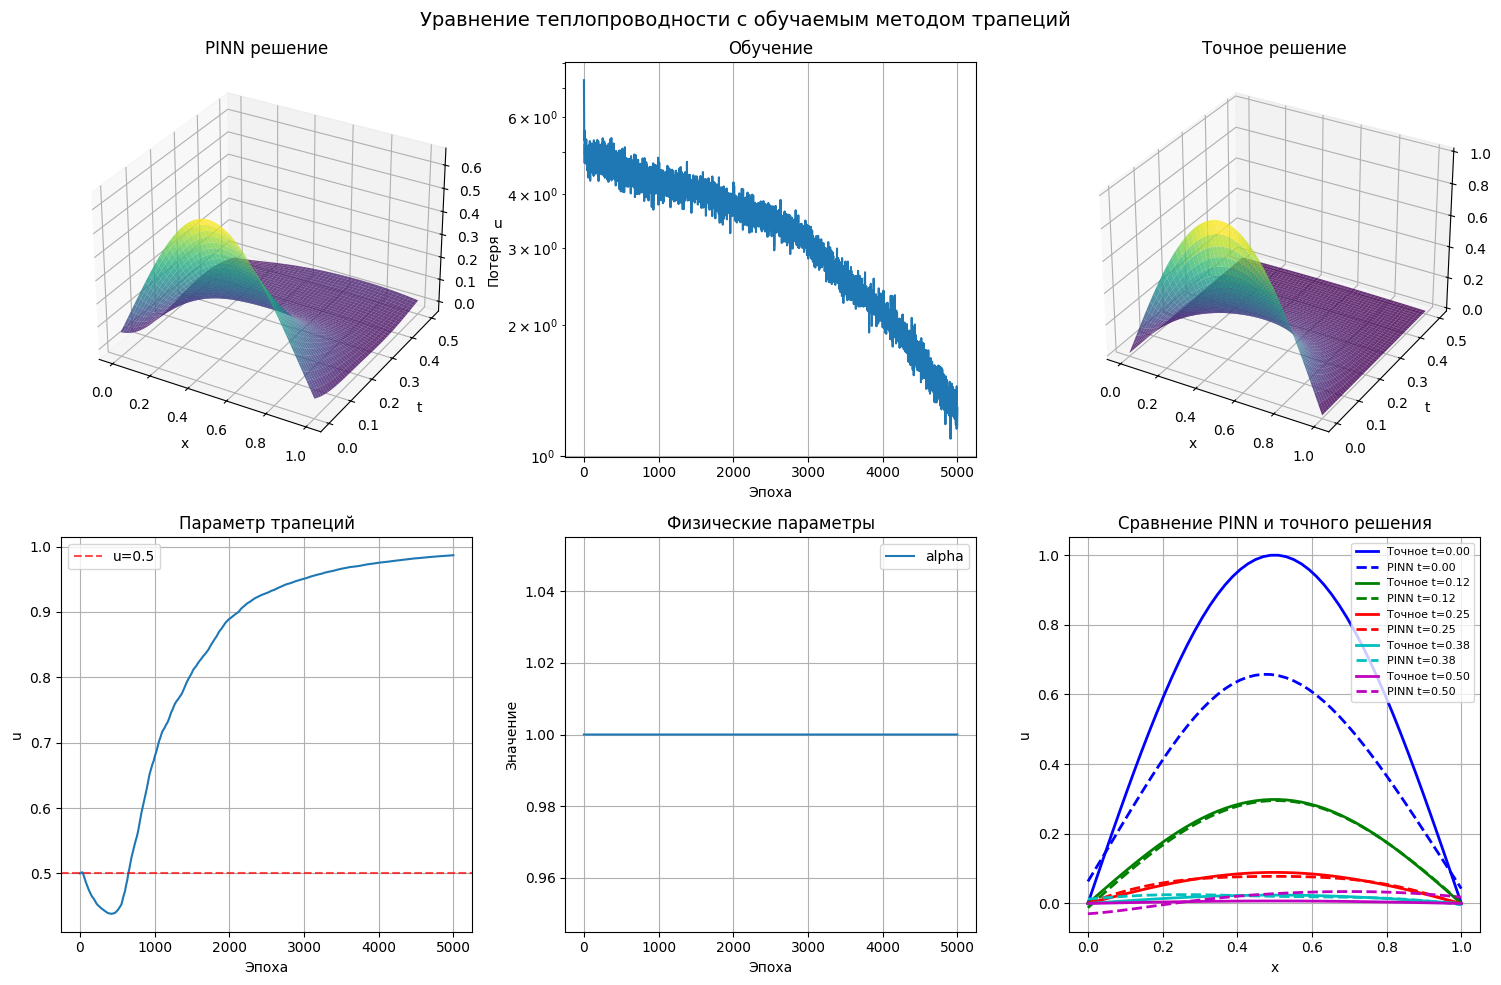

Финальные параметры: {'u': 0.9867838621139526, 'alpha': 1}
Финальная потеря: 1.2898e+00


In [3]:
test_heat()

Тест: Волновое уравнение
Epoch    0: Loss=3.69e+00, PDE=1.05e-04, BC=3.77e-02, IC=3.31e-01, 
Epoch  500: Loss=2.20e+00, PDE=3.61e-02, BC=8.63e-02, IC=1.30e-01, 
Epoch 1000: Loss=1.49e+00, PDE=1.80e-01, BC=5.93e-02, IC=7.21e-02, 
Epoch 1500: Loss=9.30e-01, PDE=1.18e-01, BC=4.58e-02, IC=3.54e-02, 
Epoch 2000: Loss=2.87e-01, PDE=6.24e-02, BC=1.56e-02, IC=6.85e-03, 
Epoch 2500: Loss=1.14e-01, PDE=2.67e-02, BC=6.27e-03, IC=2.47e-03, 
Epoch 3000: Loss=7.62e-02, PDE=1.62e-02, BC=4.54e-03, IC=1.46e-03, 
Epoch 3500: Loss=5.05e-02, PDE=1.00e-02, BC=3.19e-03, IC=8.58e-04, 
Epoch 4000: Loss=3.74e-02, PDE=6.67e-03, BC=2.30e-03, IC=7.72e-04, 
Epoch 4500: Loss=2.68e-02, PDE=4.37e-03, BC=1.65e-03, IC=5.96e-04, 
u-параметр: 0.5019
PDE остаток: 5.18e-03
Средняя ошибка: 6.15e-02


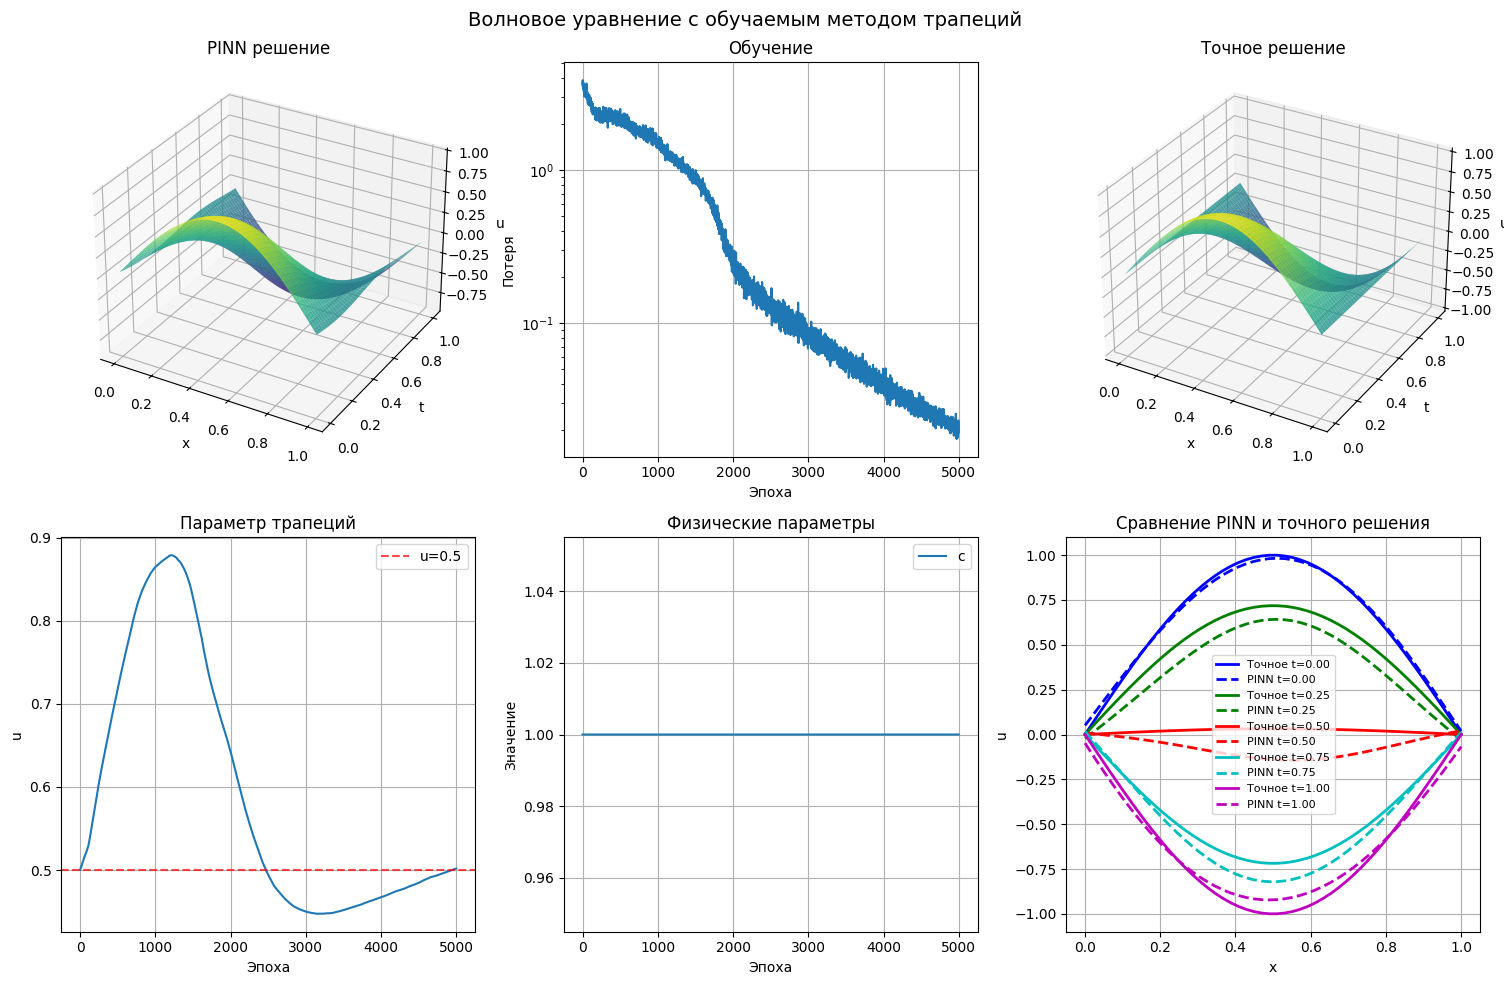

Финальные параметры: {'u': 0.5018539428710938, 'c': 1.0}
Финальная потеря: 2.0091e-02


In [4]:
test_wave()

Тест: Уравнение Пуассона
Epoch    0: Loss=1.09e+02, PDE=1.04e+02, BC=5.56e-03, 
Epoch  500: Loss=7.37e+01, PDE=7.04e+01, BC=3.32e-03, 
Epoch 1000: Loss=1.64e+01, PDE=1.27e+01, BC=3.76e-03, 
Epoch 1500: Loss=7.27e+00, PDE=5.04e+00, BC=2.23e-03, 
Epoch 2000: Loss=4.33e+00, PDE=3.07e+00, BC=1.26e-03, 
Epoch 2500: Loss=3.01e+00, PDE=2.16e+00, BC=8.45e-04, 
Epoch 3000: Loss=2.53e+00, PDE=1.70e+00, BC=8.32e-04, 
Epoch 3500: Loss=2.64e+00, PDE=1.75e+00, BC=8.89e-04, 
Epoch 4000: Loss=2.21e+00, PDE=1.50e+00, BC=7.04e-04, 
Epoch 4500: Loss=2.37e+00, PDE=1.67e+00, BC=6.96e-04, 
u-параметр: 0.6120
PDE остаток: 1.73e+00
Средняя ошибка: 8.46e-03


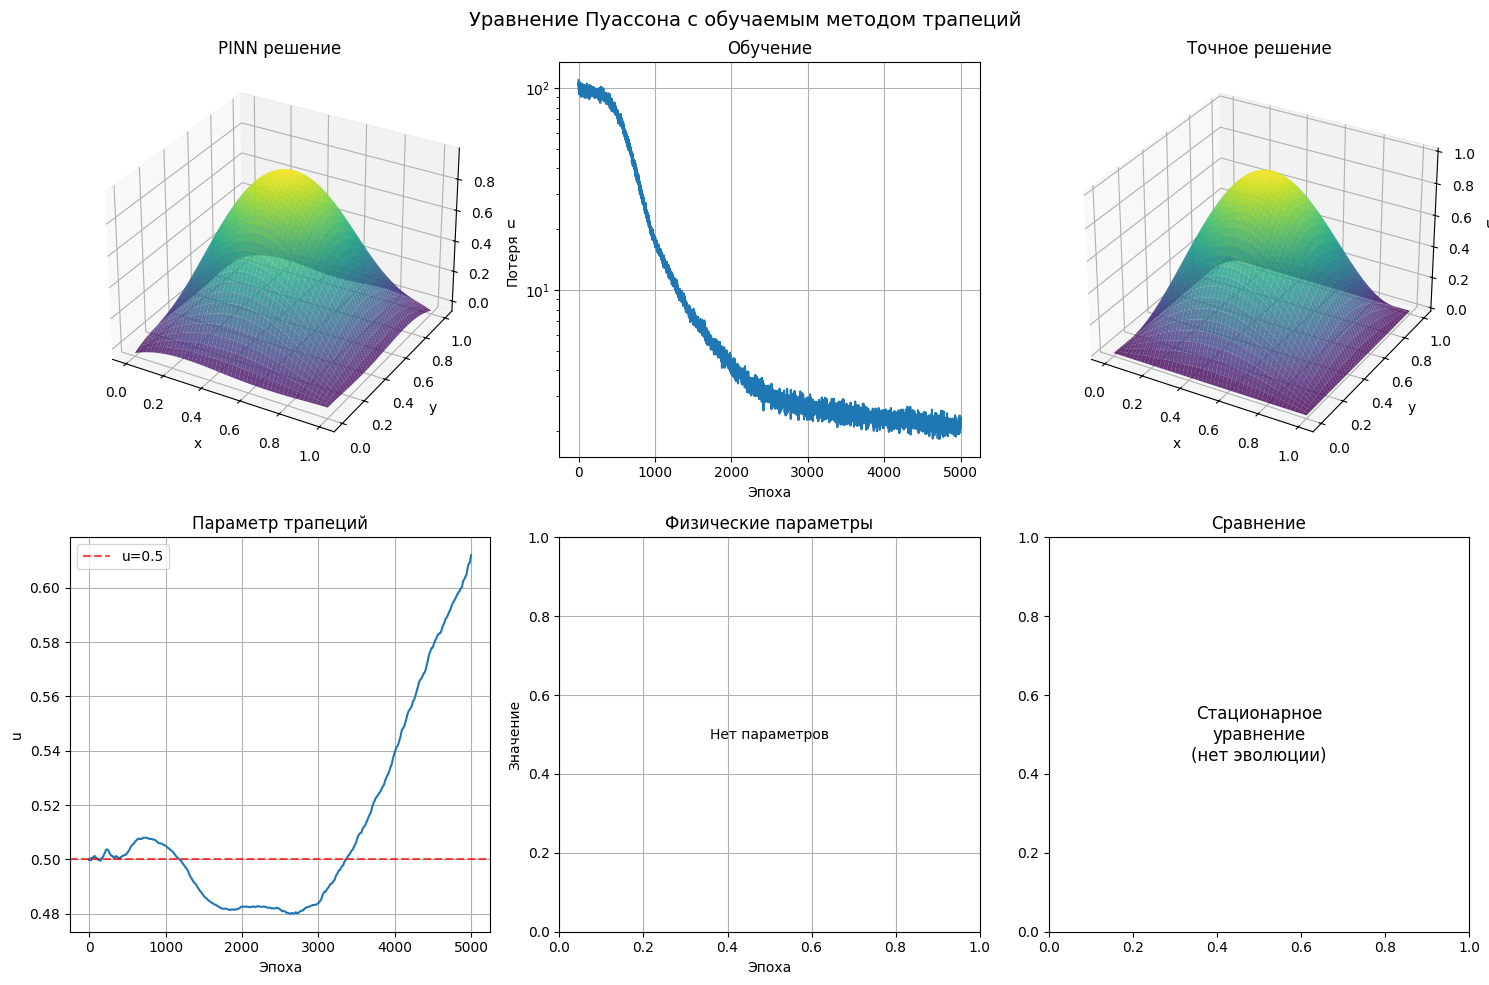

Финальные параметры: {'u': 0.6119651794433594}
Финальная потеря: 2.3368e+00


In [5]:
test_poisson()

Тест: Уравнение диффузии
Epoch    0: Loss=1.42e+01, PDE=4.61e-02, BC=6.31e-01, IC=7.86e-01, 
Epoch  500: Loss=1.79e-01, PDE=5.66e-03, BC=1.30e-03, IC=1.60e-02, 
Epoch 1000: Loss=5.48e-02, PDE=2.69e-03, BC=2.91e-04, IC=4.92e-03, 
Epoch 1500: Loss=1.07e-02, PDE=2.20e-03, BC=4.05e-05, IC=8.05e-04, 
Epoch 2000: Loss=4.88e-03, PDE=1.37e-03, BC=2.15e-05, IC=3.30e-04, 
Epoch 2500: Loss=2.38e-03, PDE=7.42e-04, BC=1.73e-05, IC=1.47e-04, 
Epoch 3000: Loss=1.32e-03, PDE=5.35e-04, BC=5.99e-06, IC=7.25e-05, 
Epoch 3500: Loss=1.02e-03, PDE=5.74e-04, BC=2.18e-06, IC=4.23e-05, 
Epoch 4000: Loss=9.42e-04, PDE=6.41e-04, BC=1.41e-06, IC=2.87e-05, 
Epoch 4500: Loss=7.89e-04, PDE=5.08e-04, BC=1.55e-06, IC=2.66e-05, 
u-параметр: 0.0660
PDE остаток: 5.42e-04
Средняя ошибка: 3.35e-02


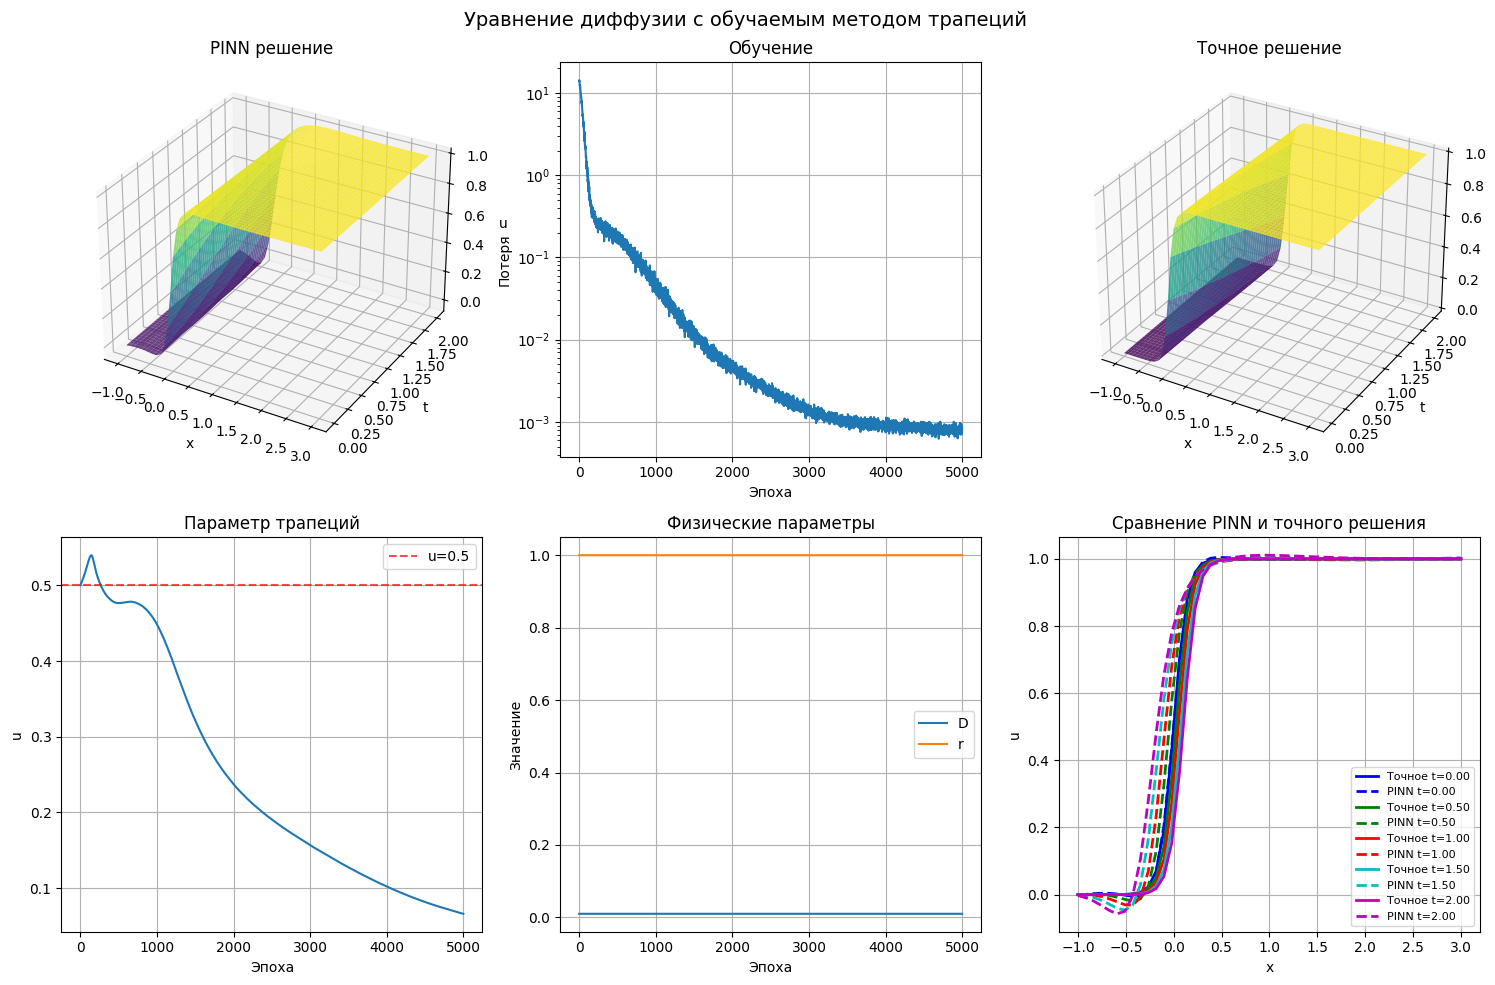

Финальные параметры: {'u': 0.06597341597080231, 'D': 0.009999999776482582, 'r': 1.0}
Финальная потеря: 8.3532e-04


In [6]:
test_reaction_diffusion()

Тест: Уравнение Бюргерса
Epoch    0: Loss=7.26e+00, PDE=1.55e-01, BC=7.16e-02, IC=6.39e-01, 
Epoch  500: Loss=3.42e+00, PDE=1.56e-02, BC=2.68e-02, IC=3.14e-01, 
Epoch 1000: Loss=7.17e-01, PDE=2.51e-01, BC=7.46e-03, IC=3.91e-02, 
Epoch 1500: Loss=5.16e-01, PDE=2.67e-01, BC=5.67e-03, IC=1.92e-02, 
Epoch 2000: Loss=3.33e-01, PDE=1.88e-01, BC=3.58e-03, IC=1.09e-02, 
Epoch 2500: Loss=2.87e-01, PDE=1.58e-01, BC=2.97e-03, IC=9.93e-03, 
Epoch 3000: Loss=2.61e-01, PDE=1.56e-01, BC=2.14e-03, IC=8.41e-03, 
Epoch 3500: Loss=2.31e-01, PDE=1.42e-01, BC=1.77e-03, IC=7.12e-03, 
Epoch 4000: Loss=2.28e-01, PDE=1.31e-01, BC=1.94e-03, IC=7.73e-03, 
Epoch 4500: Loss=2.09e-01, PDE=1.26e-01, BC=1.14e-03, IC=7.23e-03, 


/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 2/utils/pde_utils.py:201: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  num, _ = quad(lambda eta: numerator_integrand(eta, x[i,0], t[i,0]),
/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 2/utils/pde_utils.py:201: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  num, _ = quad(lambda eta: numerator_integrand(eta, x[i,0], t[i,0]),
/Users/igor.velikorechanin/Desktop/Masters/Thesis/GitHub PINN 2/utils/pde_utils.py:203: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  den, _ = quad(lambda eta: denominator_integrand(eta, x[i,0], t[i,0]),


u-параметр: 0.9159
PDE остаток: 1.35e-01
Средняя ошибка: 7.29e-02


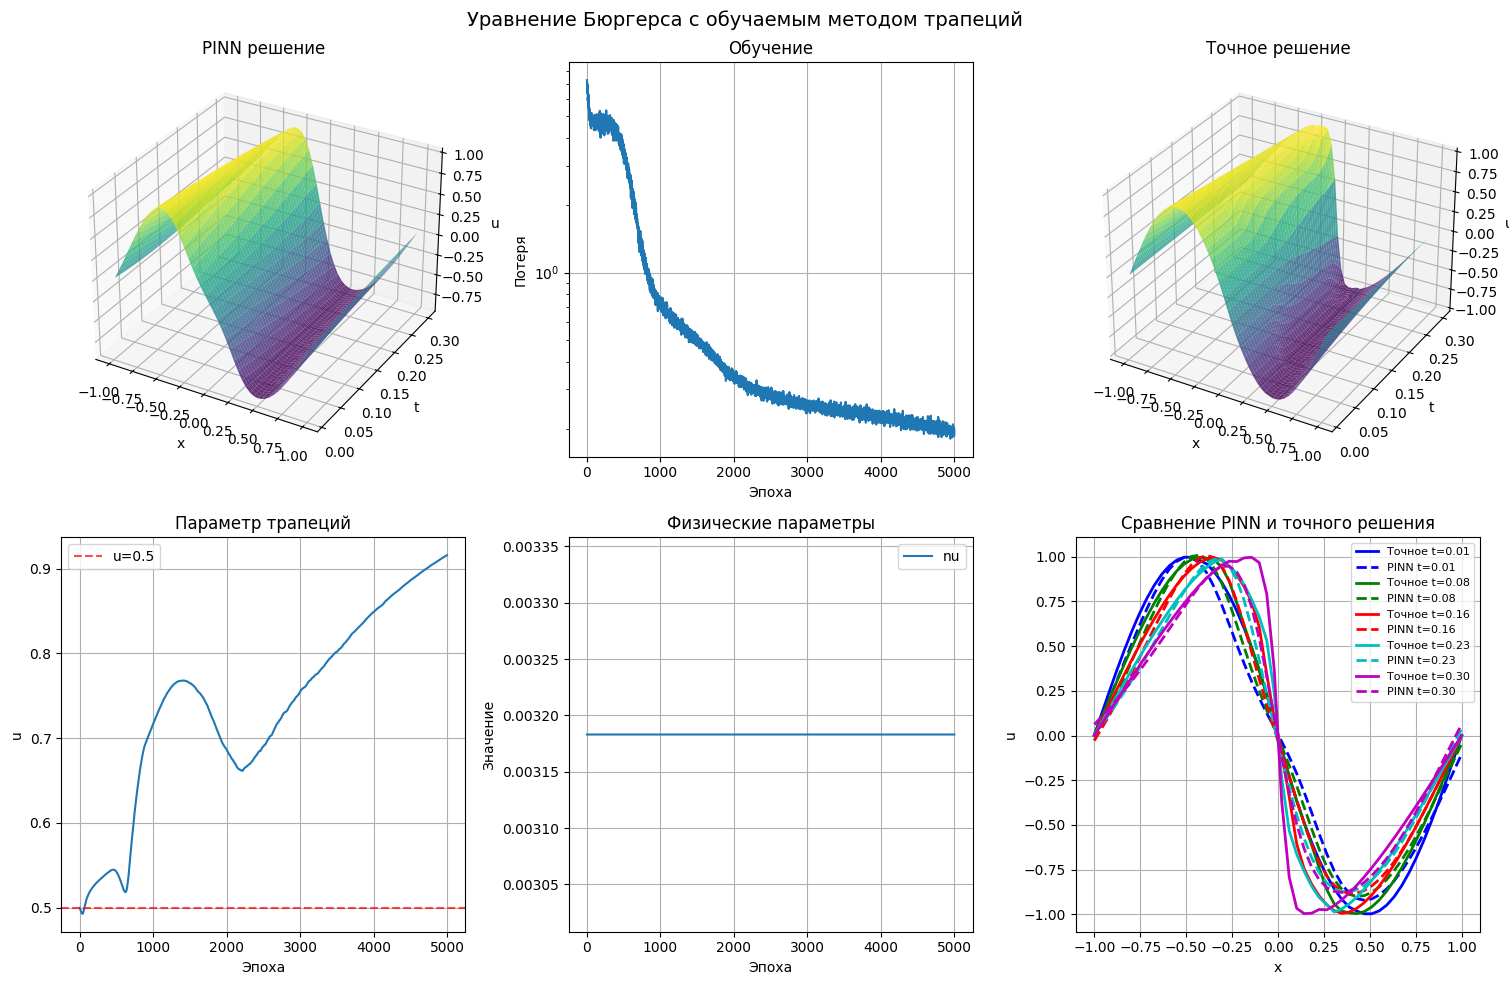

Финальные параметры: {'u': 0.9158945679664612, 'nu': 0.0031830989755690098}
Финальная потеря: 1.9880e-01


In [7]:
test_burgers()